#### StudentName: Victor Cardoso
#### Student ID : 6930

####A. Importing libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D, MaxPooling2D, Flatten, Dropout
from google.colab import drive
from keras.models import load_model

Using TensorFlow backend.


####B. Data loading

In [2]:
np.random.seed(100)
path = ""
drive.mount('/content/drive/')
path = "/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges"

#training data path
trn_dta_dir = path + "/train"

#validation data path
val_dta_dir = path + "/validation"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


####C. Data augmentation

In [0]:
#training data generator
trn_dta_gtr = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

#validation data generator
val_dta_gtr = ImageDataGenerator(rescale=1./255)

####D. Data preparation

In [4]:

#training generator
trn_gtr = trn_dta_gtr.flow_from_directory(
    trn_dta_dir,
    target_size=(50, 50),
    batch_size=16,
    class_mode="binary")

#validation generator
val_gtr = val_dta_gtr.flow_from_directory(
    val_dta_dir,
    target_size=(50, 50),
    batch_size=16,
    class_mode="binary")


Found 834 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


####E. Model architecture

In [0]:
mdl = Sequential()

mdl.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
mdl.add(Activation("relu"))
mdl.add(MaxPooling2D(pool_size=(2, 2)))

mdl.add(Conv2D(32, (3, 3)))
mdl.add(Activation("relu"))
mdl.add(MaxPooling2D(pool_size=(2, 2)))

mdl.add(Flatten())
mdl.add(Dense(16))
mdl.add(Activation("relu"))
mdl.add(Dropout(0.5))
mdl.add(Dense(1))
mdl.add(Activation("sigmoid"))

mdl.compile(loss="binary_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

####F. Training and Validation

In [7]:
hist = mdl.fit_generator(
                        trn_gtr,
                        steps_per_epoch=len(trn_gtr.filenames),
                        epochs=3,
                        validation_data=val_gtr,
                        validation_steps=len(val_gtr.filenames)
                        )

Epoch 1/3
834/834 [==============================] - 345s 414ms/step - loss: 0.3548 - accuracy: 0.8482 - val_loss: 0.1804 - val_accuracy: 0.9595
Epoch 2/3
834/834 [==============================] - 138s 165ms/step - loss: 0.2233 - accuracy: 0.9243 - val_loss: 0.2521 - val_accuracy: 0.9609
Epoch 3/3
834/834 [==============================] - 137s 165ms/step - loss: 0.2368 - accuracy: 0.9173 - val_loss: 0.0106 - val_accuracy: 0.9595


Below we will start doing some tests in the optimizers we have. We will also plot the graph of loss and epochs so we can compare in how many epochs the model start to be overfitted and we also will be able to see in every Training and validation the Loss, the accuracy, the value of loss an the value of accuracy. 

It is important to mention that I tested with 5 epochs for every optimizer so I could compare then. It will be able to see that some optimizers (most of then) started to be overfitted in from its second or third epoch. So it can be seen that we do not need to go further than 5 to get a good model, as more epochs would leave us to extra time training the model and overfitting it. 

**Adagrad Optimizer**

The ADAGRAD is considered to be good for sparse data. In our case, we have found with this optimizer a 95% of accuracy and according to the graph for Training Loss Function we would be overfitting our model after 3 epochs. That means is working pretty well with our dataset so far. However its loss value in epoch 3 is 84. We will see a "better" option in other optimizer below. 

In [0]:
mdl_2 = Sequential()

mdl_2.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
mdl_2.add(Activation("relu"))
mdl_2.add(MaxPooling2D(pool_size=(2, 2)))

mdl_2.add(Conv2D(32, (3, 3)))
mdl_2.add(Activation("relu"))
mdl_2.add(MaxPooling2D(pool_size=(2, 2)))

mdl_2.add(Flatten())
mdl_2.add(Dense(16))
mdl_2.add(Activation("relu"))
mdl_2.add(Dropout(0.5))
mdl_2.add(Dense(1))
mdl_2.add(Activation("sigmoid"))

mdl_2.compile(loss="binary_crossentropy",
              optimizer="adagrad",
              metrics=["accuracy"])

In [9]:
hist_2 = mdl_2.fit_generator(
                        trn_gtr,
                        steps_per_epoch=len(trn_gtr.filenames),
                        epochs=5,
                        validation_data=val_gtr,
                        validation_steps=len(val_gtr.filenames)
                        )

Epoch 1/5
834/834 [==============================] - 139s 167ms/step - loss: 0.3181 - accuracy: 0.8575 - val_loss: 0.0229 - val_accuracy: 0.9602
Epoch 2/5
834/834 [==============================] - 138s 166ms/step - loss: 0.1894 - accuracy: 0.9237 - val_loss: 0.0495 - val_accuracy: 0.9797
Epoch 3/5
834/834 [==============================] - 139s 166ms/step - loss: 0.1492 - accuracy: 0.9392 - val_loss: 0.0084 - val_accuracy: 0.9797
Epoch 4/5
834/834 [==============================] - 137s 164ms/step - loss: 0.1219 - accuracy: 0.9482 - val_loss: 0.0162 - val_accuracy: 0.9803
Epoch 5/5
834/834 [==============================] - 140s 167ms/step - loss: 0.1057 - accuracy: 0.9552 - val_loss: 0.1370 - val_accuracy: 0.9693


**Loss**

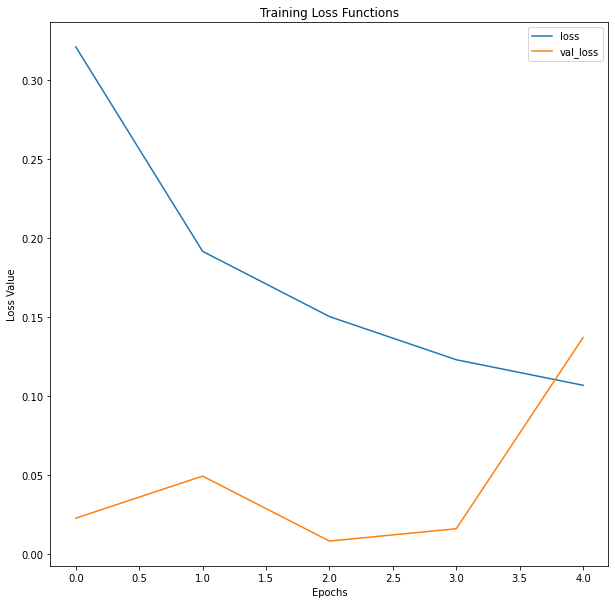

In [20]:
loss = hist_2.history['loss']
val_loss = hist_2.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])
plt.savefig('/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges/loss_fig.png')
plt.show()

**RMSPROP Optmizer**

The RMSPROP is giving us a good accuracy value, around 94%. The loss in epoch 4 is 41, which is low and gives us 92% of accuracy as well. After this epoch, the loss goes really high and after down. For that reason, it makes us believe that optimizer can not be as good as it looks like, as it gives us an uncertain loss values and the accuracy go not much better from 92%.

In [0]:
mdl_3 = Sequential()

mdl_3.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
mdl_3.add(Activation("relu"))
mdl_3.add(MaxPooling2D(pool_size=(2, 2)))

mdl_3.add(Conv2D(32, (3, 3)))
mdl_3.add(Activation("relu"))
mdl_3.add(MaxPooling2D(pool_size=(2, 2)))

mdl_3.add(Flatten())
mdl_3.add(Dense(16))
mdl_3.add(Activation("relu"))
mdl_3.add(Dropout(0.5))
mdl_3.add(Dense(1))
mdl_3.add(Activation("sigmoid"))

mdl_3.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [11]:
hist_3 = mdl_3.fit_generator(
                        trn_gtr,
                        steps_per_epoch=len(trn_gtr.filenames),
                        epochs=5,
                        validation_data=val_gtr,
                        validation_steps=len(val_gtr.filenames)
                        )

Epoch 1/5
834/834 [==============================] - 140s 167ms/step - loss: 0.2990 - accuracy: 0.8764 - val_loss: 0.0631 - val_accuracy: 0.9602
Epoch 2/5
834/834 [==============================] - 137s 165ms/step - loss: 0.1925 - accuracy: 0.9284 - val_loss: 0.0041 - val_accuracy: 0.9700
Epoch 3/5
834/834 [==============================] - 138s 165ms/step - loss: 0.1717 - accuracy: 0.9399 - val_loss: 0.3849 - val_accuracy: 0.9609
Epoch 4/5
834/834 [==============================] - 137s 165ms/step - loss: 0.1613 - accuracy: 0.9427 - val_loss: 0.0454 - val_accuracy: 0.9704
Epoch 5/5
834/834 [==============================] - 140s 168ms/step - loss: 0.1527 - accuracy: 0.9483 - val_loss: 0.4844 - val_accuracy: 0.9707


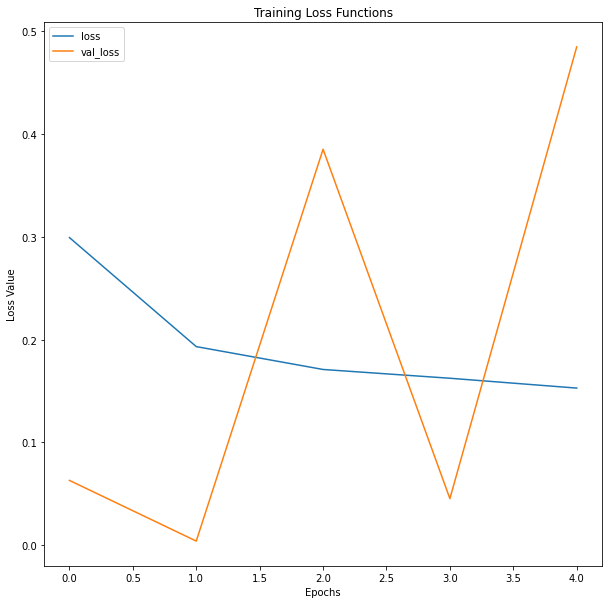

In [21]:
loss = hist_3.history['loss']
val_loss = hist_3.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])
plt.savefig('/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges/loss_fig.png')
plt.show()

**SGD Optimizer**

The SGD is considered to be good as a optimezer for largers dataset. For our case, the SGD started with a really low accuracy and after the second epoch already was getting overfitted, according to the Loss graph. The loss value is also high in every epoch, which make us not trust as much as we could in that optimizer. Moreover, the accuracy was not much bigger than 92% which is lower that we have found with other optimizers. In this sense, we can decide to not use this optimizer in this specific case. That can mean that this optimizer would be better if we had a bigger dataset.

In [0]:
mdl_4 = Sequential()

mdl_4.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
mdl_4.add(Activation("relu"))
mdl_4.add(MaxPooling2D(pool_size=(2, 2)))

mdl_4.add(Conv2D(32, (3, 3)))
mdl_4.add(Activation("relu"))
mdl_4.add(MaxPooling2D(pool_size=(2, 2)))

mdl_4.add(Flatten())
mdl_4.add(Dense(16))
mdl_4.add(Activation("relu"))
mdl_4.add(Dropout(0.5))
mdl_4.add(Dense(1))
mdl_4.add(Activation("sigmoid"))

mdl_4.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
hist_4 = mdl_4.fit_generator(
                        trn_gtr,
                        steps_per_epoch=len(trn_gtr.filenames),
                        epochs=5,
                        validation_data=val_gtr,
                        validation_steps=len(val_gtr.filenames)
                        )

Epoch 1/5
834/834 [==============================] - 139s 167ms/step - loss: 0.6084 - accuracy: 0.6673 - val_loss: 0.4569 - val_accuracy: 0.7095
Epoch 2/5
834/834 [==============================] - 137s 164ms/step - loss: 0.4050 - accuracy: 0.8270 - val_loss: 0.1306 - val_accuracy: 0.9316
Epoch 3/5
834/834 [==============================] - 139s 166ms/step - loss: 0.2906 - accuracy: 0.8945 - val_loss: 0.0651 - val_accuracy: 0.9497
Epoch 4/5
834/834 [==============================] - 137s 164ms/step - loss: 0.2301 - accuracy: 0.9222 - val_loss: 0.1555 - val_accuracy: 0.9599
Epoch 5/5
834/834 [==============================] - 139s 166ms/step - loss: 0.2150 - accuracy: 0.9254 - val_loss: 0.2427 - val_accuracy: 0.9295


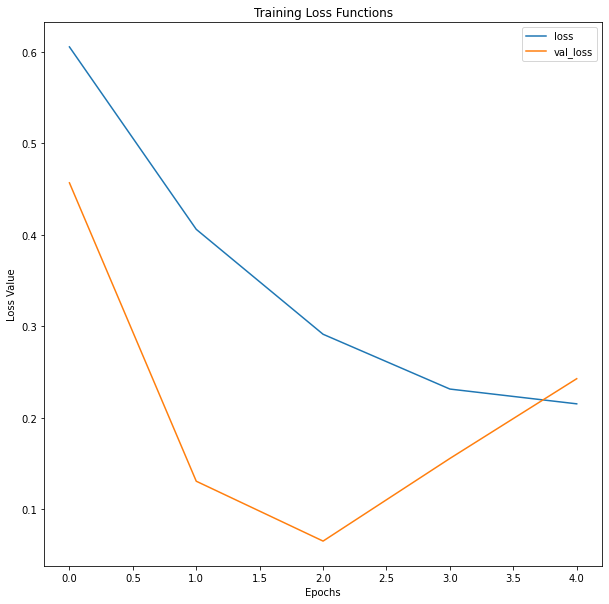

In [22]:
loss = hist_4.history['loss']
val_loss = hist_4.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])
plt.savefig('/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges/loss_fig.png')
plt.show()

**ADADELTA Optimizer**

The ADADELTA is a extension of Adagrad, so we could believe it can be a better version of the optimzer to reduce the learning rate. And that is interesting that it shows in the results below. Comparing to the Adagrad, the Adadelta has a overfit already after epoch 2, and it takes from epoch 2 to get a higher accuracy like 91% and after that does not show to have much better results. The loss value is also high in almost of epochs, getting low (33) only in fifith epoch where it was already overfitting the model.



In [0]:
mdl_5 = Sequential()

mdl_5.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
mdl_5.add(Activation("relu"))
mdl_5.add(MaxPooling2D(pool_size=(2, 2)))

mdl_5.add(Conv2D(32, (3, 3)))
mdl_5.add(Activation("relu"))
mdl_5.add(MaxPooling2D(pool_size=(2, 2)))

mdl_5.add(Flatten())
mdl_5.add(Dense(16))
mdl_5.add(Activation("relu"))
mdl_5.add(Dropout(0.5))
mdl_5.add(Dense(1))
mdl_5.add(Activation("sigmoid"))

mdl_5.compile(loss="binary_crossentropy",
              optimizer="adadelta",
              metrics=["accuracy"])

In [15]:
hist_5 = mdl_5.fit_generator(
                        trn_gtr,
                        steps_per_epoch=len(trn_gtr.filenames),
                        epochs=5,
                        validation_data=val_gtr,
                        validation_steps=len(val_gtr.filenames)
                        )

Epoch 1/5
834/834 [==============================] - 139s 167ms/step - loss: 0.4101 - accuracy: 0.7915 - val_loss: 0.0463 - val_accuracy: 0.9204
Epoch 2/5
834/834 [==============================] - 137s 165ms/step - loss: 0.2222 - accuracy: 0.9123 - val_loss: 0.0335 - val_accuracy: 0.9616
Epoch 3/5
834/834 [==============================] - 137s 165ms/step - loss: 0.1867 - accuracy: 0.9330 - val_loss: 0.2002 - val_accuracy: 0.9693
Epoch 4/5
834/834 [==============================] - 136s 163ms/step - loss: 0.1569 - accuracy: 0.9428 - val_loss: 0.3099 - val_accuracy: 0.9796
Epoch 5/5
834/834 [==============================] - 140s 168ms/step - loss: 0.1359 - accuracy: 0.9502 - val_loss: 0.0035 - val_accuracy: 0.9818


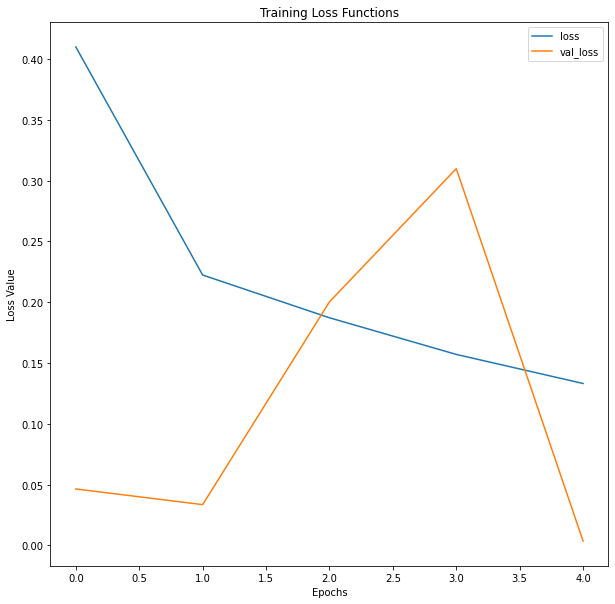

In [23]:
loss = hist_5.history['loss']
val_loss = hist_5.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])
plt.savefig('/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges/loss_fig.png')
plt.show()

ADAMAX

This optimizer is giving us an accuracy higher than 80% from its firts epoch and show it is learning well until its epoch 3, where its loss start to get higher and showing that we are overfitting the model. 
Moreover, the accuracy in epoch 4 is already in 95% and the loss value is only of 18. That makes us believe that would be a good optimizer to be chosen for this dataset. 

In [0]:
mdl_6 = Sequential()

mdl_6.add(Conv2D(32, (3, 3), input_shape=(50,50,3)))
mdl_6.add(Activation("relu"))
mdl_6.add(MaxPooling2D(pool_size=(2, 2)))

mdl_6.add(Conv2D(32, (3, 3)))
mdl_6.add(Activation("relu"))
mdl_6.add(MaxPooling2D(pool_size=(2, 2)))

mdl_6.add(Flatten())
mdl_6.add(Dense(16))
mdl_6.add(Activation("relu"))
mdl_6.add(Dropout(0.5))
mdl_6.add(Dense(1))
mdl_6.add(Activation("sigmoid"))

mdl_6.compile(loss="binary_crossentropy",
              optimizer="adamax",
              metrics=["accuracy"])

In [17]:
hist_6 = mdl_6.fit_generator(
                        trn_gtr,
                        steps_per_epoch=len(trn_gtr.filenames),
                        epochs=5,
                        validation_data=val_gtr,
                        validation_steps=len(val_gtr.filenames)
                        )

Epoch 1/5
834/834 [==============================] - 141s 169ms/step - loss: 0.2862 - accuracy: 0.8843 - val_loss: 0.0609 - val_accuracy: 0.9602
Epoch 2/5
834/834 [==============================] - 136s 163ms/step - loss: 0.1818 - accuracy: 0.9380 - val_loss: 0.0726 - val_accuracy: 0.9204
Epoch 3/5
834/834 [==============================] - 137s 165ms/step - loss: 0.1430 - accuracy: 0.9462 - val_loss: 0.0126 - val_accuracy: 0.9895
Epoch 4/5
834/834 [==============================] - 136s 163ms/step - loss: 0.1216 - accuracy: 0.9547 - val_loss: 0.0018 - val_accuracy: 0.9803
Epoch 5/5
834/834 [==============================] - 139s 167ms/step - loss: 0.1033 - accuracy: 0.9611 - val_loss: 0.0350 - val_accuracy: 0.9902


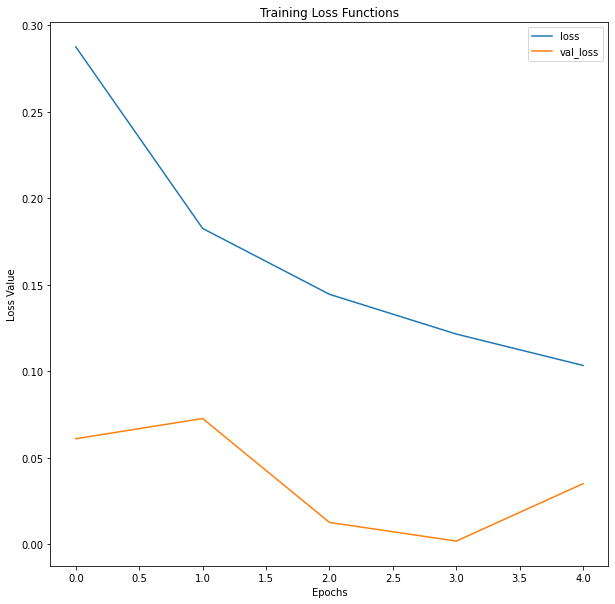

In [33]:
loss = hist_6.history['loss']
val_loss = hist_6.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])
plt.savefig('/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges/loss_fig.png')
plt.show()

####G. Plot Loss Functions

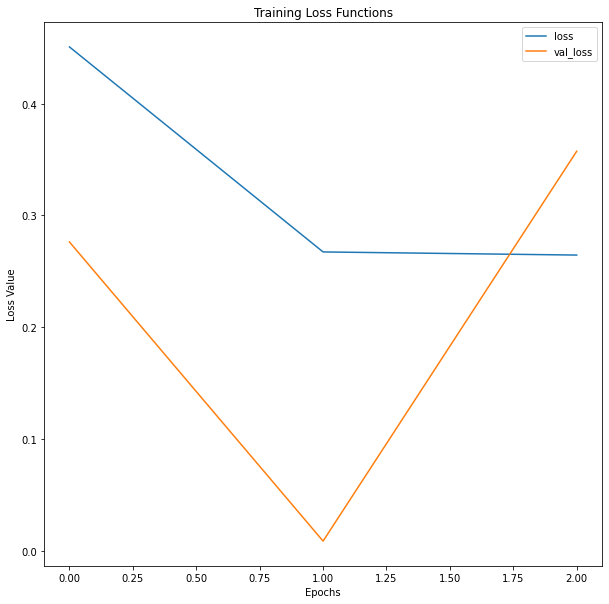

In [0]:
# That is the figure already given in the start of the assignemt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.figure(figsize=(10,10))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training Loss Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])
plt.savefig('/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges/loss_fig.png')
plt.show()

**CONCLUSION**

As potted above, we have compare some cases and briefly showed some reason why we have chosen the optimizer we did, the ADAMAX.

FOr this reason, we will save as final model the model_6 using ADAMAX optimizer and with 4 epochs.



####H. Save the model

In [0]:
mdl_6.save("/content/drive/My Drive/Artificial Intel/Assignments/Task 1 - Image Classification/ApplesAndOranges/model_6930.h5")